In [ ]:
#프로젝트(명확하게)
#결과발표시 보고서는 3가지(듣는 사람이 궁금할 것을 모두 적어 질문이 없도록 -> 서론과 결론이 명확하게)
#1.목표 : (왜 이런 발표를 하는가? 명확하게 -> 어떠한 것을 해결하여 최종적인 목표를 내기 위해서 어떠한 작업을 했는가?)
#         왜 이프로젝트를 했는가
#2.본론 : 마음데로(다료를 어떻게 구했고...코드에 대한 내용)
#          팔수 : 데이터를 이용해서 무언가를 예측하는 것이기때문에 데이터 와 예측이 무조건 들어가야 한다(활용한 데이터, 출처,가공 방법)
#          그래서 그 데이터로 머싱러닌을 돌려서 어떠한 결과를 얻어서 예측결과로 무엇을 도출할 수 있는가?
#          (예축이 잘 안나왔다면 나의 예측과 어느부분이 다르고 원래는 어떻게 나왔어야 했는지 그래서 어떻게 활용할 수 있는지) 
#3.결론 : 어떠한 목표를 갖고 어떠한 결과를 얻었다. 시간에 제약을 받았으면 어느부분에서 받았고 부족했던 점은?, 팀원들 각자의 소감
#         프로젝트를 얼마나 왼성했고 완성을 못 했다면 이유는
# 이번 프로젝트를 통해 무엇을 얻었고 앞으로 어떠한 것에 도움이 될것 또는 활용이 가능할것 같다...
#
#
#
#프로젝트 목표 : 처음 부터 끝까지 해보는 것.
#
#(지역별 대학교 증감 추이, 식습관에 따른 결과, 수면시간에 대한 결과, 연도별 온도 상승 변의로 향후 여름 온도 예측,전기차 증가 대수로 인한 향후 전기차 시잔)
#저출산 증감 -> 결과, 코로나로 인한 경기 둔화와 현재 추의로 미래 예측
#ex.(보통mnist 데이터로 사람 성격 파악?)

In [5]:
import numpy as np
import matplotlib.pyplot as plt #matplotlib.pyplot 모듈의 각각의 함수를 사용해서 간편하게 그래프를 만들고 변화를 줄 수 있습니다.

In [6]:
import tensorflow as tf
from tensorflow import keras 
#텐서플로(TensorFlow)는 구글(Google)에서 만든, 딥러닝 프로그램을 쉽게 구현할 수 있도록 다양한 기능을 제공해주는 라이브러리다.  
#데스크탑이나 서버 시스템의 여러개의 CPU와 GPU에서[6] (GPU에서 일반 연산을 수행하게 하는 CUDA 확장기능을 사용) 구동될 수 있다. 
#텐서플로 연산은 상태를 가지는 데이터 흐름(stateful dataflow) 유향 그래프로 표현된다. 

In [7]:
#MNIST ->  MNIST는 숫자로 쓴 데이터 베이스
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() # ->  MNIST데이터를 불러오기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#육만장의 사진을 불러오고 테스트 데이터가 만장 이라는의미 28의 의미는 사진 한장이 28(높이,행)*28(넓이,열)(높이 28 넓이 28)
#[0]첫번째장 부터 불러 와서

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
X_train[0][10:15, 10:15] #열을 10에서 15, 행을 10에서 15까지 자른 것

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

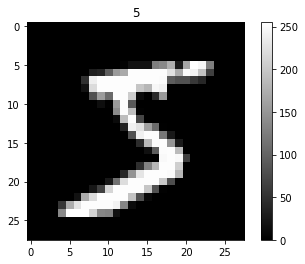

In [9]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.colorbar()

In [10]:
X_train.max(), X_train.min

(255, <function ndarray.min>)

In [11]:
#데이터 전처리

In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape
#mnist는 6만개의 데이터가 저장됨 
#X_train.shape => 28*28사이즈의 6만개의 이미지가 있다.
#y_train.shape => x데이터의 이미지 숫자(0~9) 즉, 라벨링 된 6만개의 데이터 존재 
# X_test => 28*28사이즈의 10만개의 이미지 존재
#y_test => X데이터의 이미지 숫자(0~9) 만개 존재

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
X_train = X_train.reshape(60000, 28*28)/255
X_test = X_test.reshape(10000, 28*28)/255 
#reshape 는 2차원 표의 형태를(28*28) 1차원으로 바꾸어 주는 역할
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [14]:
###원핫코딩
#표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
#np.eye 함수는 행과 열이 같은 위치는 1을 원소로 갖고 나머지는 0을 원소로 갖는 단위행렬을 생성
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [15]:
X_train.max(), X_train.min() #최대값, 최소값

(1.0, 0.0)

In [16]:
y_train[0] #5자리에 1이라는 의미 원래는 숫자 5였는데 원핫코딩으로 바꾸어 구현
#원핫코딩 사용 이유 : 
# EX) 개,고양이,원숭이를 구분하는 문제가 있다면 개는 0번, 고양이1번 원숭이2번을 주어 결과값으로 해당 값을 출력하려고 할때
# 데이터가 3개 이상일때는 컴퓨터는 숫자가 나열되어 있으면 0다음1다음2가 나온다는 순서,거리, 간격이 생겨 패턴으로 인식()
#==>값을 주어서 도출X(컴퓨터가 규칙을 만들어 생각하게 되기 때문)
#
#다중분류(3개 이상일때는 목표값을 자기 자리에만 1일 들어가도록 바꾸어 주어야 한다.)

#100, 010, 001로 표현


#### ==>y_train[0]의 경우 목표값은 총 10개가 나오게 된다

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [17]:
model = keras.models.Sequential() 
model.add(keras.layers.Dense(10, input_shape=(784, ),activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [19]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 2s 953us/step - loss: 0.5170 - acc: 0.8678 - val_loss: 0.3302 - val_acc: 0.9115
Epoch 2/20
1407/1407 [==============================] - 1s 833us/step - loss: 0.3187 - acc: 0.9122 - val_loss: 0.2967 - val_acc: 0.9181
Epoch 3/20
1407/1407 [==============================] - 1s 832us/step - loss: 0.2932 - acc: 0.9178 - val_loss: 0.2875 - val_acc: 0.9205
Epoch 4/20
1407/1407 [==============================] - 1s 826us/step - loss: 0.2804 - acc: 0.9213 - val_loss: 0.2821 - val_acc: 0.9215
Epoch 5/20
1407/1407 [==============================] - 1s 808us/step - loss: 0.2725 - acc: 0.9235 - val_loss: 0.2790 - val_acc: 0.9235
Epoch 6/20
1407/1407 [==============================] - 1s 817us/step - loss: 0.2667 - acc: 0.9244 - val_loss: 0.2755 - val_acc: 0.9237
Epoch 7/20
1407/1407 [==============================] - 1s 810us/step - loss: 0.2625 - acc: 0.9264 - val_loss: 0.2762 - val_acc: 0.9244
Epoch 8/20
1407/1407 [==========================

In [20]:
h=model.history.history #그래프로 나타내기

<function matplotlib.pyplot.legend(*args, **kwargs)>

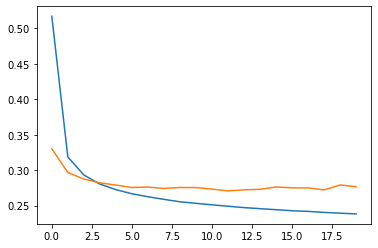

In [23]:
plt.subplot
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend

In [40]:
#중간층 추가

In [44]:
model = keras.models.Sequential() 
model.add(keras.layers.Dense(10,activation='relu', input_shape=(784, )))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, input_shape=(784, ),activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
#categorical_crossentropy -> 3개이상 쌍으로 softmax (여러개를 구분하는 문제일 경우)
# optimizer='adam' => 가중치를 바꾸어 주는 최신 기술이다.
#문제가 2개일 경우 바이너리

In [46]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4893 - acc: 0.8535 - val_loss: 0.2696 - val_acc: 0.9197
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2627 - acc: 0.9220 - val_loss: 0.2378 - val_acc: 0.9268
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2276 - acc: 0.9331 - val_loss: 0.2254 - val_acc: 0.9331
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2070 - acc: 0.9382 - val_loss: 0.2161 - val_acc: 0.9355
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1908 - acc: 0.9424 - val_loss: 0.2056 - val_acc: 0.9381
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1807 - acc: 0.9444 - val_loss: 0.2012 - val_acc: 0.9410
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1710 - acc: 0.9481 - val_loss: 0.2073 - val_acc: 0.9377
Epoch 8/20
1407/1407 [==============================] - 3s 2ms

In [47]:
#깃허브 자료 확인(0으로가는 가중치 .... 9로 가는 가중치)
W = model.get_weights()[0] #0으로 가는 가중치만 뽑아낸것
W.shape

(784, 10)

In [48]:
#softmax의 기능 
#입력값이 여러개 있고 중간층이 3개 다음 소프트맥스가 있고 -> 결과가 있으면
#중간층 3개가 5,-2,0이면 
#첫번째로 나가는 출력값이 e의5승+e의-2승+e의0승 분에 e의5승이 되어 출력값이 나간다
#따라서 각 출력값은 0.8, 0.05, 0.15가 된다 => 양수로 나가기 위함??
#여러개의 값일 경우 softmax를 적용 시킨다.

#sigmoid를 적용할 것인가, softmax를 적용시킬 것인가




#입력값 -> 출력값을 도출하면서 가중치 값을 바꾸면서 오차를 수정하는 과정

In [ ]:
##################################################################################################################################

In [ ]:
#CNN 구조

In [60]:
#신경망을 사용하며 분석하기 위해서는 분석할 대상의 지식이 필요하다.

#사진에 대한 신경망(분석)을 하기 때문에 사진에 대한 이해가 필요하다
#칼러 사진은 == 흑백사진 3개로 구성되어 있다(rgb값이 각각 어떻게 되어있는지 3장으로 분리) red,green,blue
#흑백 사진 3장을 겹치면 -> 칼라사진이 된다.
#
#모니터 또한 각각의 필셀이 모여 있다 -> 하나의 필셀당 전구 3개(rgb)가 붙어 있다. 
#(모두켜지면 흰색, 모두꺼지면 검은색)  (빨+초=노, 초+파=하, 빨+파=보)  ,  모두켜진것255 or F로 표현 한다
#사진에도 rgb의 3개의 층이 존재
#칼러 사진은 3개의 흑백으로 되어 있는데 이때 3개의 사진을 깊이 또는 채널이라고 부른다.
#눈끝에 시신경 세포들이 있는데 실제로 빨간색,파란색,녹색 뉴런들이 있어 이 뉴런들이 색을 구분한다.
#
#==>픽셀 하나당 값이 3개다 or 컬러 사진 1개는 흑백 사진 3장이다 라고 이해를 한다.(기본 사진에 대한 이해)
#
#
# convolution : 필터
#필터 100개를 넣으면 100개의 사진이 나오고, 채널 또한 100개가 된다.
#변환하고 크기를 반으로 줄인다=>pooling아라고 부른다. 제일 마지막에는 사진이 어떤 사진인지 판단을 한다.
# ==> cnn알고리즘이란 convolution, pooling을 반복하는 과정
#
#(필터를 씌우면서 변환을 하면서 학습??)
#
#
#컴퓨터, 카메라의 경우 계산을 해주어야 한다.(자연의 경우 빛만 통과 하면 보이지만 기계의 경우)
#숫자로 된 원본 사진을 -> 변환 시키면 사진의 숫자 또한 바뀐다.
#필터는 원본 크기만큼 씌우는게 아니라 일정 부분만 유리조각으로 씌운다.-> 일정부분 필터를 끼우면 -> 변환된 사진이 나온다

#(일정 원본의 원래의 값 * 변환된값)의 총합이 변환된 사진에 적용이 된다) - 값은 0과1 사이
#
#
#

In [49]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
import tensorflow as tf
from tensorflow import keras

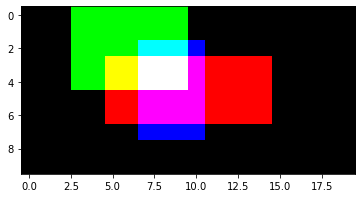

In [57]:
a = np.zeros([10,20,3])
a[3:7, 5:15, 0] = 1  #높이는 3에서7까지 가로는 5에서 15까지 채널은 0번 ()
a[:5, 3:10, 1] = 1 #녹색 부분에 1을 넣었기 때문에 녹색
a[2:8, 7:11, 2] = 1 #파란색 채널에(2) 1을 넣었기 때문에 파란색
#이때 채널 0(r),1(g),2(b)    , =하고 꼭 1이아니라 0.5등 표현 가능 이때 1은 255를 의미 한다.
plt.imshow(a)
    

In [ ]:
#  X가 3차원이 된다 , 출력은 y값을 정해주면 된다

In [ ]:
#처음 필터값을 랜덤하게 주어 계산한다.
#신경망은 오차가 나오면 줄이기 때문에 다음번에 돌때는 가중치(필터값)이 바뛰는 작업을 계속하는 것이다.
#
#
#필터를 씌우는 방법은 임의의 크기를 맨왼쪽 위부터 한칸씩 띄면서 이동 모두 이동하면 처음으로 가서 한칸 아래로 이동 후 반복
#-> 이렇게 이동하면서 위에서 계산한느 값의 합으로 결과가 나온다(크기도 행,열 2칸씩 작아진다.)

In [62]:
#MINST 

In [75]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape #흑백 사진을 불러오는 작업, 흑백사진은 채널이 없다 or 채녈이 1이다.

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [76]:
#X값 전처리 과정
X_train = X_train.reshape(60000, 28,28,1)/255 #600000*28세로*28가로*1(채널), 
X_test = X_test.reshape(10000,28,28,1)/255

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [77]:
#y값 준비 완료
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [78]:
#설계도를 만드는 과정
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3),padding='same',
                             activation='relu', input_shape=(28,28,1))) 
#convolution으로 바꾸기, inputshape->사진의 모양이 어떠냐? 자진의 모양은 28*28*1이다라는 의미
model.add(keras.layers.MaxPool2D(2)) #pooling작게 , 크기를 반으로 줄여러
model.add(keras.layers.Conv2D(64, (3,3),padding='same', activation='relu')) 
#활성함수는 relu(모자)를 쓴다(cnn에서는 이함수가 성능이 좋다) ==> 양수는통과 음수는 통과를 못 하기에 양수만 나온다.
#필터를 몇개를 지정할 것 인가? -> 64장 사용한다 , 필터의 크기(필터는 보통 3*3 or 5*5의 크기)? (3,3)-->필터 하나의 크기를 의미
#padding='smae' : 변환 과정을 거치면 원본이 작아지기 때문에 그렇게 하지 말고 변환된 사진의 크기를 원본괴 같게 해라라는 의미
model.add(keras.layers.MaxPool2D(2)) 
model.add(keras.layers.Flatten())  #사진을 펼친다.(1차원으로) 과정이 끝나면 마지막에 해주어야 한다
model.add(keras.layers.Dense(10,activation='softmax')) #10가지를 고려할 것이다. 3가지 이상을 분류하는 것은 =>softmax를 사용 한다.

model.summary();
#사진을 바꾸고 줄이고 바꾸고 줄이는 반복 과정
#==>처음 사진 한장이 -> 64장이 되고 이 64장이 -> 64장이 된다

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 10)              

In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [80]:
model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2) #육만장 사진을 128개 넣어서 분류하면 끝난다?

Epoch 1/20
375/375 [==============================] - 20s 52ms/step - loss: 0.2602 - acc: 0.9262 - val_loss: 0.0850 - val_acc: 0.9747
Epoch 2/20
375/375 [==============================] - 20s 53ms/step - loss: 0.0682 - acc: 0.9793 - val_loss: 0.0616 - val_acc: 0.9822
Epoch 3/20
375/375 [==============================] - 20s 54ms/step - loss: 0.0504 - acc: 0.9843 - val_loss: 0.0521 - val_acc: 0.9833
Epoch 4/20
375/375 [==============================] - 20s 54ms/step - loss: 0.0408 - acc: 0.9874 - val_loss: 0.0471 - val_acc: 0.9861
Epoch 5/20
375/375 [==============================] - 21s 55ms/step - loss: 0.0337 - acc: 0.9896 - val_loss: 0.0438 - val_acc: 0.9874
Epoch 6/20
375/375 [==============================] - 21s 56ms/step - loss: 0.0285 - acc: 0.9909 - val_loss: 0.0440 - val_acc: 0.9877
Epoch 7/20
375/375 [==============================] - 21s 56ms/step - loss: 0.0242 - acc: 0.9926 - val_loss: 0.0433 - val_acc: 0.9874
Epoch 8/20
375/375 [==============================] - 21s 56ms

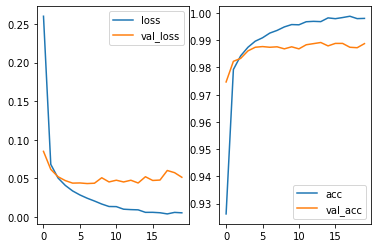

In [84]:
h = model.history.history

plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

In [85]:
pred_y = model.predict(X_test)
pred_y.shape

313/313 [==============================] - 5s 8ms/step


(10000, 10)

In [86]:
(pred_y.argmax(axis=1)==y_test.argmax(axis=1)).mean()

0.9892

In [81]:
##################################################################################################################################

In [24]:
#컬러 사진을 활용해서 해보기

In [25]:
#유심있게 봐야 하는 정보 (데이터들이 어떻게 되어 있는지 본다)
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#사진 장수가 오만장이고 높이 32 넓이 32 채널은 3개 == (5000000,32,32,3)
#(500000000, 1) : 1은 열이 하나이다?? y_train으로 출력해서 확인가능
#테스트 데이터는 만장이다

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [26]:
y_train.ravel() # --> 확인해보기 위해 출력ravel은 일차원으로 풀어주는 기능

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [27]:
X_train.dtype, X_train.max(), X_train.min()
#데이터를 정수형으로 바꾸고 최대 최소를 ??

(dtype('uint8'), 255, 0)

In [28]:
#데이터 전처리

In [29]:
###0~255값을 0.0~1.0으로 바꾼다
X_train = X_train/255
X_test = X_test/255

###원핫인코딩
y_train = np.eye(10)[y_train.ravel()] #ravel() : 1차원 형태로 바꾼다
y_test= np.eye(10)[y_test.ravel()]

X_train.shape, y_train.shape, X_train.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (50000, 32, 32, 3), (10000, 10))

In [37]:
labels = ['airplane',
'automobile',
'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']



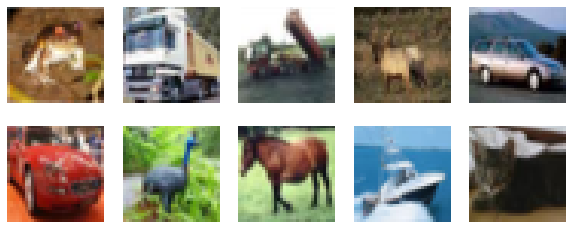

In [38]:
plt.figure(figsize=[10,4])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    


In [ ]:
##########컬러사진 부터 여기 까지 ppt확인(코드 확인) -> 실행 해보기

In [87]:
####################################################################################################################################

In [ ]:
#CNN적용 하기

In [100]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

### 0~255 값을 0.0~1.0 으로 바꾼다
X_train = X_train/255
X_test = X_test/255

### 원핫인코딩
y_train = np.eye(10)[y_train.ravel()] # ravel() : 1차원형태로 바꾼다
y_test = np.eye(10)[y_test.ravel()]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

labels = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [101]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),padding='same', 
#3*3이기때문에 필터 크기는 9(변수)개, 9*32(필터갯수) *3(실제 필터는 깊이가 있는 모양이기 때문에9개의 필터값이 
#3장이 있다 깊이가 3개기 때문) + 32(절편의 갯수)를 하면 대략 896개와 근사한 값이 나온다.
         activation='relu', input_shape=(32,32,3)))

model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax')) #마지막 출력층은 10개

model.summary()

#값이 8192개 즉 동그라미 갯수
#cnn(896)은 변수는 적지만 계산이 어렵다
#??(81930)은 변수는 많지만 계산이 쉽다

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [104]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 13s 20ms/step - loss: 1.5656 - acc: 0.4490 - val_loss: 1.3520 - val_acc: 0.5367
Epoch 2/20
625/625 [==============================] - 20s 33ms/step - loss: 1.2567 - acc: 0.5601 - val_loss: 1.2830 - val_acc: 0.5497
Epoch 3/20
625/625 [==============================] - 18s 29ms/step - loss: 1.1598 - acc: 0.5968 - val_loss: 1.1896 - val_acc: 0.5922
Epoch 4/20
625/625 [==============================] - 11s 18ms/step - loss: 1.0904 - acc: 0.6217 - val_loss: 1.1942 - val_acc: 0.5842
Epoch 5/20
625/625 [==============================] - 11s 18ms/step - loss: 1.0419 - acc: 0.6391 - val_loss: 1.1286 - val_acc: 0.6144
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 1.0003 - acc: 0.6569 - val_loss: 1.1836 - val_acc: 0.5973
Epoch 7/20
625/625 [==============================] - 10s 16ms/step - loss: 0.9667 - acc: 0.6687 - val_loss: 1.0815 - val_acc: 0.6320
Epoch 8/20
625/625 [==============================] - 10s 16ms

In [105]:
#오렌지(검증데이터) 만이천장 실제 오만이천장 ppt추가

In [106]:
###################################################################################################################################

In [ ]:
#중간층 추가 해서 해보기

In [107]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

### 0~255 값을 0.0~1.0 으로 바꾼다
X_train = X_train/255
X_test = X_test/255

### 원핫인코딩
y_train = np.eye(10)[y_train.ravel()] # ravel() : 1차원형태로 바꾼다
y_test = np.eye(10)[y_test.ravel()]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

labels = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [110]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
                             input_shape=(32,32,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 128)      

In [111]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [112]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20,
                   validation_split=0.2)

#현재 교육용은 필요 없지만 더 복잡해지면 GPu설정을 해서 사용하면 더 빨라진다
#or 구글에 colab을 치고 -> 맨위에 뜨는것(welcom으로 시작하는 것) -> 새노트 -> 
#구글에서 인공지능 개발을 위해 gpu오픈한 것(런타임 유형 관리 -> 하드웨어 가속기에 gpu선택하고 사용 시작 전에!!)
#(무료인 대신 저장은 안된다)

Epoch 1/20
625/625 [==============================] - 25s 38ms/step - loss: 1.5293 - acc: 0.4441 - val_loss: 1.2352 - val_acc: 0.5645
Epoch 2/20
625/625 [==============================] - 23s 37ms/step - loss: 1.1032 - acc: 0.6079 - val_loss: 1.0098 - val_acc: 0.6451
Epoch 3/20
625/625 [==============================] - 23s 37ms/step - loss: 0.9183 - acc: 0.6772 - val_loss: 0.9103 - val_acc: 0.6823
Epoch 4/20
625/625 [==============================] - 23s 37ms/step - loss: 0.8020 - acc: 0.7196 - val_loss: 0.8249 - val_acc: 0.7148
Epoch 5/20
625/625 [==============================] - 24s 38ms/step - loss: 0.6967 - acc: 0.7584 - val_loss: 0.7938 - val_acc: 0.7266
Epoch 6/20
625/625 [==============================] - 24s 38ms/step - loss: 0.6176 - acc: 0.7839 - val_loss: 0.7880 - val_acc: 0.7303
Epoch 7/20
625/625 [==============================] - 23s 38ms/step - loss: 0.5407 - acc: 0.8105 - val_loss: 0.7945 - val_acc: 0.7369
Epoch 8/20
625/625 [==============================] - 25s 41ms

In [113]:
#model.save('cifar_model_1.h5') /create a HDF5 file 로 저장해서 
#사용 가능

In [ ]:
#model저장하고 불러와서 사용하는 방법

In [114]:
#######################################################################

In [ ]:
#결과 분석

1/1 [==============================] - 0s 24ms/step


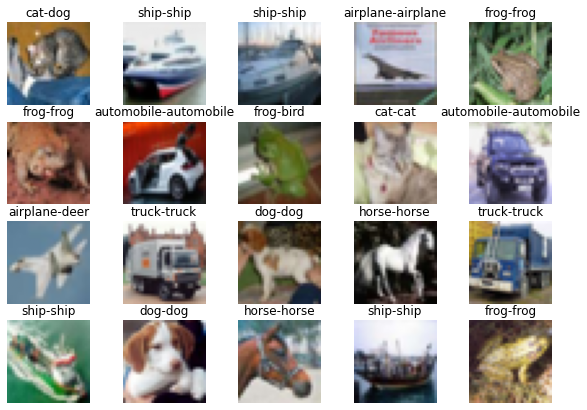

In [116]:
y_pred = model.predict(X_test[:20])
plt.figure(figsize=[10,7])

#20만 가지고 와서 예측을 해본다?
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(labels[np.argmax(y_test[i])] + '-' + labels[np.argmax(y_pred[i])])
    
    #보고서의 결과가 될 수 있다 예측한것을 확인(학습한것을 기반으로)

In [117]:
####################################################################################################################################

In [ ]:
#개와 고양이 분류(이진분류문제) - 풀어갈 방법 순서
#데이터를 불러오는 것이 아니라 사진을 직접 가지고 와서 학습 시켜 예측하는 방법
#(하나하나의 데이터를 넘파이로 바꾸어 해주는 과정 말고 편하게 하기 위해 저장 하는 방법)
#이때 폴더는 test(테스트), train(훈련), validation(검증)폴더 3개를 만든다
#train안에는 cats, dogs폴더를 두개 만든다.
#(a,b,c순으로 cat이 1 dog가2번이 된다)
#cat폴더에 사진을 넣는다, dog폴더에 개 사진을 저장 한다. - 컬러 사진으로해야 정확도가 높다.
#dogs폴더 역시 개사진들을 저장 한다
#
#test폴더와 validatuion또한 같은 형식으로 만든다.
#
#
#cats_and_dogs_small폴더 안에 모두 넣어 준다.(가장 처음 폴더)


#이미지를 가지고 오면 실수인데 500(가로)*400(세로)*3(컬러사진이라?)*3(바이트)가 사진 한장당 차지하는 메모리
#메모리가 크기 때문에 어떻게 불러 와야하나?(한번에 불러 오는 것은 불가능, 메모리가 너무 크기 때문에)
#h를 64로 주어 64장 불러와서 넘파이 어레이로 바꾸어 훈련하고 또 훈련하고 나누어 반복 하는 방법을 사용한다.

#단점은 시간이 오래 걸린다 메모리를 덜 사용하는 대신 매번 불러 오기 때문에 오래 걸린다
#캐시를 사용해야 속도가 빨라진다(알고리즘을 사용) -> 추가적으로 공부해서 해야 한다





#현재 컴퓨터에 파일을 없다

In [ ]:
#데이터 불러 오기(자긴의 pc에 있는 데이터를 불러올 경우)

In [118]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [119]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
#파일에서 사진을 20장씩 불러 오는 과정


# ppt보고 이어서 작성 하고 형식만 이해하기